# Pymaceuticals Inc.
---

### Analysis


We can see from our boxplots that the final tumor sizes for Infubinol and Ceftamin are much higher than for Capomulin or Ramicane. This might be an indication of those drugs being more effective, though naturally we can't make any difinitive conclusions with just this data.

Another thing we observe is there is a fairly strong correlation between mouse weight and average tumor size. That said, we can't make any definitive statements on causality with that correlation. A possible reason I could see if it truly is causal is that higher weight means more mass for the tumor to spread into, but again, that is something that would have to be researched further.

Ceftamin has the highest iqr by a decent margin, a bit over 4 mm3. This could indicate that it is possibly less reliable than the other treatments, with treatments involving it having a higher variation in outcomes. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv" #paths to csvs

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path) #turn csvs to dataframes

# Combine the data into a single DataFrame
combined_df=mouse_metadata.merge(study_results, on='Mouse ID', how = 'outer') #merge the two with outer so no data is lost

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = len(combined_df['Mouse ID'].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = combined_df['Mouse ID'].loc[(combined_df[['Mouse ID', 'Timepoint']].duplicated())] #loc to find which mouseid 
                                                                                #and timepoint were duplicated
dupe.unique() #find unique value of duplicated mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupedata = combined_df.loc[combined_df['Mouse ID'] == dupe.unique()[0]]
dupedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID'] != dupe.unique()[0]] #just loc to select all data minus duplicate mouse
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df['Mouse ID'].unique())
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
group = clean_df.groupby('Drug Regimen') #groupby drug regimen
summarydf= group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) #agg function to do them all in one line
summarydf = summarydf.rename(columns = {'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance',
             'std':'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}) #renaming column names
summarydf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) #I did this already basically

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

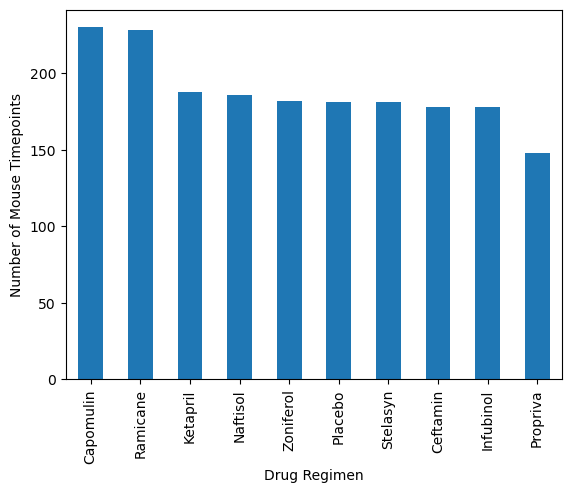

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
groupby = clean_df.groupby('Drug Regimen').count().sort_values(by = 'Mouse ID', 
                                                    ascending = False) #groupby drug regimen, count to get number of timepoints
groupby['Mouse ID'].plot(kind = 'bar', ylabel = 'Number of Mouse Timepoints') #using pandas .plot function
plt.show()

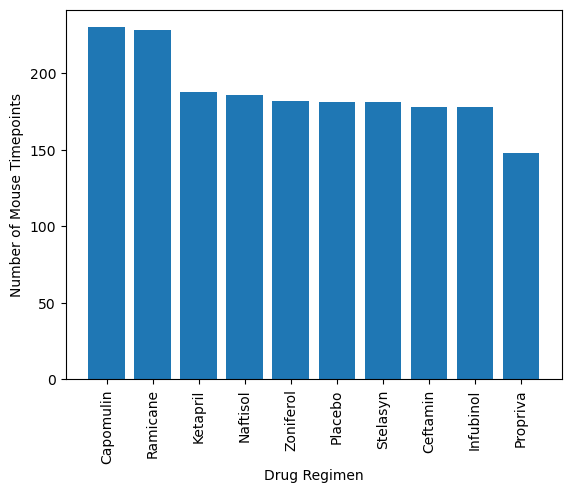

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(groupby['Mouse ID'].index, groupby['Mouse ID']) #.index because the drug regimens are the index in the groupby
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Timepoints')
plt.show()


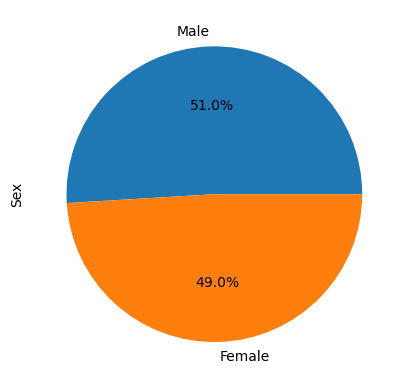

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexvalues = clean_df['Sex'].value_counts()
sexvalues.plot(kind = 'pie', autopct = '%.1f%%') #autopct did the formatting for the percents
plt.show()

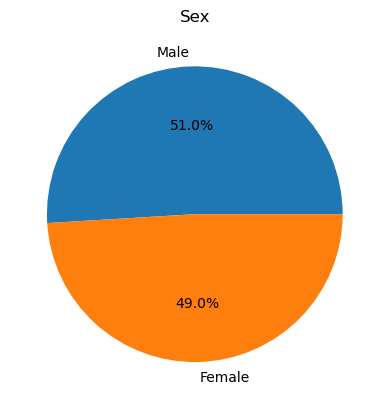

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexvalues, autopct = '%.1f%%', labels = sexvalues.index)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#new dataframe with only those 4 drugs

# Start by getting the last (greatest) timepoint for each mouse
grouping = reduced.groupby('Mouse ID')['Timepoint'].max()
#use groupby to get max timepoint for every mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = reduced.merge(grouping, on = "Mouse ID", how = 'outer')
merged = merged.rename(columns = {"Timepoint_x":"Timepoint", "Timepoint_y":"Final Time"})
merged = merged.reset_index()
#used outer so I wouldn't have nan values. Then renamed because I had 2 timepoint columns

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] #list of drug names

# Create empty list to fill with tumor vol data (for plotting)
dctvol = {} #decided to create libraries as I found it easier to loop over and store data in in this case
dctstats = {} #dctvol is for the volume data while dctstats is for statistical data, like quartiles, iqr, and outliers
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in range(len(drugs)):
    dctvol[drugs[d] + ' Volume'] = [] #create new empty list for every drug
    dctstats[drugs[d] + ' outliers'] = [] #create new empty list for every drug
    temp = merged.loc[merged['Drug Regimen'] == drugs[d]] #a temporary dataframe overwritten every loop to only contain one drug's data
    for i in temp.index: #only use index values available in the temp dataframe. Could also have reset the index and used
                        #len() to loop over number of rows but I found this easier
        if temp['Timepoint'][i] == temp['Final Time'][i]:#if the timepoint is the final one
            dctvol[drugs[d] + ' Volume'].append(merged['Tumor Volume (mm3)'][i]) #append volume with final volume
    seriepd = pd.Series(dctvol[drugs[d] + ' Volume']) #convert volume data into pandas series so I can use pd.quantile
    quarts = seriepd.quantile([0.25,.5,.75]) #quantiles
    dctstats[drugs[d] + ' iqr']=quarts[0.75]-quarts[0.25] #find and store iqr
    dctstats[drugs[d] + ' lowerbound'] = quarts[0.25]-(1.5*dctstats[drugs[d] + ' iqr']) #find and store lower bound
    dctstats[drugs[d] + ' upperbound'] = quarts[0.75]+(1.5*dctstats[drugs[d] + ' iqr']) #find and store upper bound
    for j in range(len(dctvol[drugs[d] + ' Volume'])):
        if dctvol[drugs[d] + ' Volume'][j] < dctstats[drugs[d] + ' lowerbound'] or \
        dctvol[drugs[d] + ' Volume'][j] > dctstats[drugs[d] + ' upperbound']: #lower than lowerbound or higher than upper bound
            dctstats[drugs[d] + ' outliers'].append(dctvol[drugs[d] + ' Volume'][j]) #append outliers list
    print(drugs[d] + "'s iqr is " +  str(dctstats[drugs[d] + ' iqr'])) #print iqrs
    print(drugs[d] + "'s potential outliers: " +  str(dctstats[drugs[d] + ' outliers'])) #print outliers
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's iqr is 7.781863460000004
Capomulin's potential outliers: []
Ramicane's iqr is 9.098536719999998
Ramicane's potential outliers: []
Infubinol's iqr is 11.477135160000003
Infubinol's potential outliers: [36.3213458]
Ceftamin's iqr is 15.577752179999997
Ceftamin's potential outliers: []


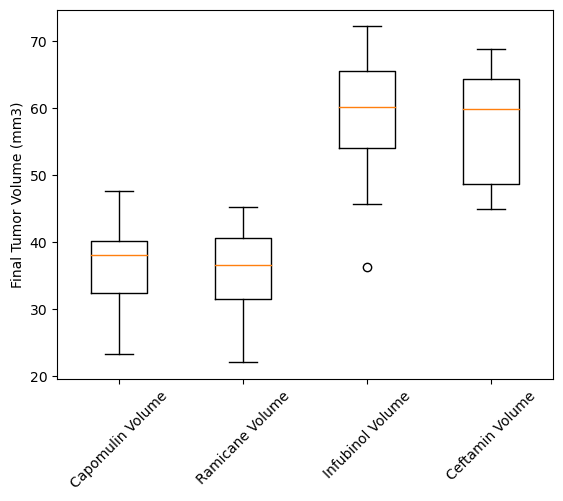

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(dctvol.values(), labels = dctvol.keys()) #just using plt's boxplot function
plt.xticks(rotation = 45)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

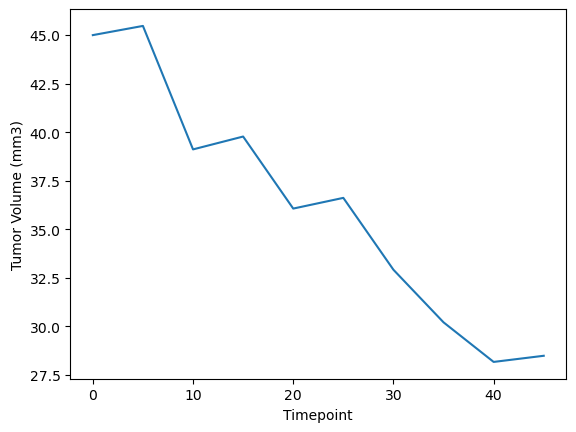

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseid = merged['Mouse ID'].loc[merged['Drug Regimen'] == 'Capomulin'].unique()[1]
mousestats = merged.loc[merged['Mouse ID'] == mouseid] #find a mouse that took Capomulin
plt.plot(mousestats['Timepoint'], mousestats['Tumor Volume (mm3)']) #plot their data
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

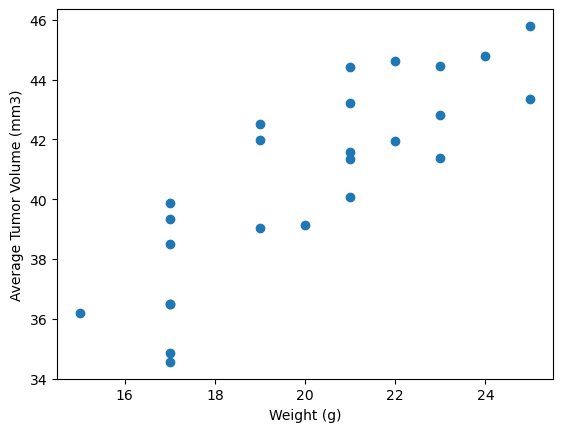

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
groupscatter = merged.loc[merged['Drug Regimen'] == 'Capomulin'].groupby("Mouse ID")
avevol = groupscatter['Tumor Volume (mm3)'].mean()
weight = groupscatter['Weight (g)'].mean()
plt.scatter(weight, avevol) 
#use mean for weight because the weight will be the same for all entries of any given mouse
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


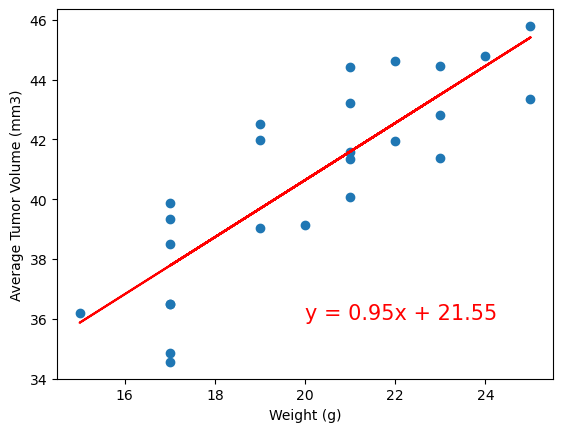

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avevol) #took this from a previous example
                                                                            #we worked on in class
regline = weight*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36), fontsize=15,color="red")
plt.plot(weight,regline,"r-")
plt.scatter(weight, avevol) 
print("The correlation between mouse weight and the average tumor volume is " + str(round(rvalue,2)))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()